In [ ]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

In [ ]:
coordinates_df = pd.read_csv("/content/coordenadas_reto.csv", header=None)
coordinates_df.head()

,0,1
0,70.627410,71.608972
1,117.092542,75.959595
2,74.251261,33.984747
3,167.312737,74.584444
4,170.492919,62.572807


In [ ]:
# Calculate the pairwise distance matrix
num_cities = len(coordinates_df)
distance_matrix = np.zeros((num_cities, num_cities))
for i in range(num_cities):
  for j in range(num_cities):
    if i != j:
      distance_matrix[i, j] = np.sqrt((coordinates_df.iloc[i, 0] - coordinates_df.iloc[j, 0])**2 +
                                      (coordinates_df.iloc[i, 1] - coordinates_df.iloc[j, 1])**2)

In [ ]:
def calculate_total_distance_optimized(route, distance_matrix):
    """Calculate the total distance of a TSP route."""
    total_distance = 0
    for idx in range(len(route) - 1):
        total_distance += distance_matrix[route[idx], route[idx + 1]]
    total_distance += distance_matrix[route[-1], route[0]]
    return total_distance

def create_random_bee_tsp(num_cities):
    """Create a random bee for TSP."""
    route = np.random.permutation(num_cities)
    return {'route': route}

def search_neigh_tsp_optimized(parent, neigh_size, num_cities):
    """Search in the neighborhood of a TSP route."""
    neigh_routes = []
    for _ in range(neigh_size):
        new_route = parent['route'].copy()
        # Implementing a 2-opt swap
        swap_indices = np.random.choice(num_cities, 2, replace=False)
        i, j = min(swap_indices), max(swap_indices)
        new_route[i:j+1] = list(reversed(new_route[i:j+1]))
        neigh_routes.append({'route': new_route})
    # Evaluate the fitness of the neighborhood
    for route in neigh_routes:
        route['fitness'] = -calculate_total_distance_optimized(route['route'], distance_matrix)
    neigh_routes.sort(key=lambda x: x['fitness'], reverse=True)
    return neigh_routes[0]

def plot_route(route, coordinates_df, title=""):
    """Plot a TSP route using the city coordinates."""
    route_coords = coordinates_df.iloc[route]
    plt.figure(figsize=(10, 6))
    plt.scatter(route_coords[0], route_coords[1], c='red', marker='o')
    for idx in range(len(route) - 1):
        plt.plot([route_coords.iloc[idx, 0], route_coords.iloc[idx + 1, 0]],
                 [route_coords.iloc[idx, 1], route_coords.iloc[idx + 1, 1]], 'k-')
    # Closing the route
    plt.plot([route_coords.iloc[-1, 0], route_coords.iloc[0, 0]],
             [route_coords.iloc[-1, 1], route_coords.iloc[0, 1]], 'k-')
    plt.title(title)
    plt.xlabel("X")
    plt.ylabel("Y")
    plt.grid(True)
    plt.show()

def bees_algorithm_tsp_bees_distribution(max_gens, num_cities, num_bees, num_sites, elite_sites, e_bees, o_bees):
    """Optimized bees algorithm for TSP with final bees distribution"""
    best = None
    pop = [create_random_bee_tsp(num_cities) for i in range(num_bees)]

    for gen in range(max_gens):
        for bee in pop:
            bee['fitness'] = -calculate_total_distance_optimized(bee['route'], distance_matrix)

        pop.sort(key=lambda b: b['fitness'], reverse=True)
        if not best or pop[0]['fitness'] > best['fitness']:
            best = pop[0]

        next_gen = []
        for i, parent in enumerate(pop[:num_sites]):
            neigh_size = e_bees if i < elite_sites else o_bees
            next_gen.append(search_neigh_tsp_optimized(parent, neigh_size, num_cities))
        scouts = [create_random_bee_tsp(num_cities) for _ in range(num_bees - len(next_gen))]
        for scout in scouts:
            scout['fitness'] = -calculate_total_distance_optimized(scout['route'], distance_matrix)
        pop = next_gen + scouts
        print(f" > it={gen+1}, best_fitness={-best['fitness']:.2f}")

    print(f"Final Best Route: {best['route']}")

    # Plot the final bees distribution
    bee_indices = list(range(len(pop)))
    fitness_values = [bee['fitness'] for bee in pop]
    plt.figure(figsize=(12, 7))
    plt.scatter(bee_indices, fitness_values, color='red', marker='o', label="Bees")
    plt.scatter(bee_indices[0], best['fitness'], color='blue', marker='s', s=100, label='Best Solution')
    plt.xlabel("Bees")
    plt.ylabel("Fitness (Negative Distance)")
    plt.title("Distribution of Bees in terms of Fitness")
    plt.legend()
    plt.grid(True)
    plt.show()

    return best

 > it=1, best_fitness=11557.61
 > it=2, best_fitness=11296.36
 > it=3, best_fitness=11225.61
 > it=4, best_fitness=10933.89
 > it=5, best_fitness=10624.98
 > it=6, best_fitness=10447.11
 > it=7, best_fitness=10337.59
 > it=8, best_fitness=10134.39
 > it=9, best_fitness=9988.23
 > it=10, best_fitness=9816.83
 > it=11, best_fitness=9587.29
 > it=12, best_fitness=9319.32
 > it=13, best_fitness=9182.35
 > it=14, best_fitness=8957.70
 > it=15, best_fitness=8781.99
 > it=16, best_fitness=8470.40
 > it=17, best_fitness=8468.95
 > it=18, best_fitness=8196.25
 > it=19, best_fitness=8144.97
 > it=20, best_fitness=8078.09
 > it=21, best_fitness=7909.98
 > it=22, best_fitness=7789.28
 > it=23, best_fitness=7674.19
 > it=24, best_fitness=7446.08
 > it=25, best_fitness=7445.45
 > it=26, best_fitness=7337.43
 > it=27, best_fitness=7283.80
 > it=28, best_fitness=7154.77
 > it=29, best_fitness=6890.14
 > it=30, best_fitness=6782.88
 > it=31, best_fitness=6696.04
 > it=32, best_fitness=6654.61
 > it=33,

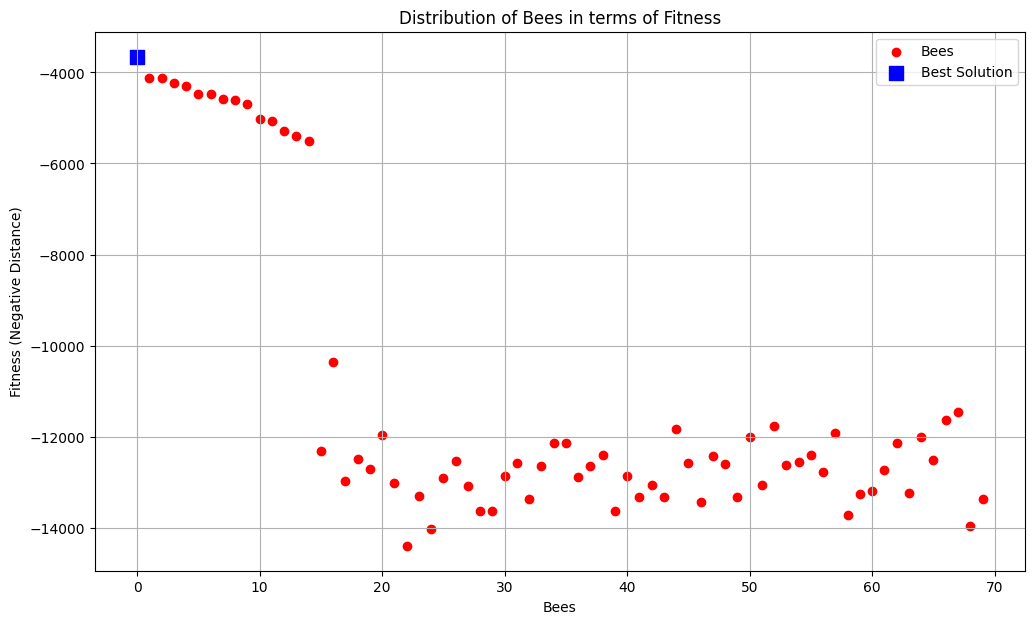

Best Solution: Distance=3667.24


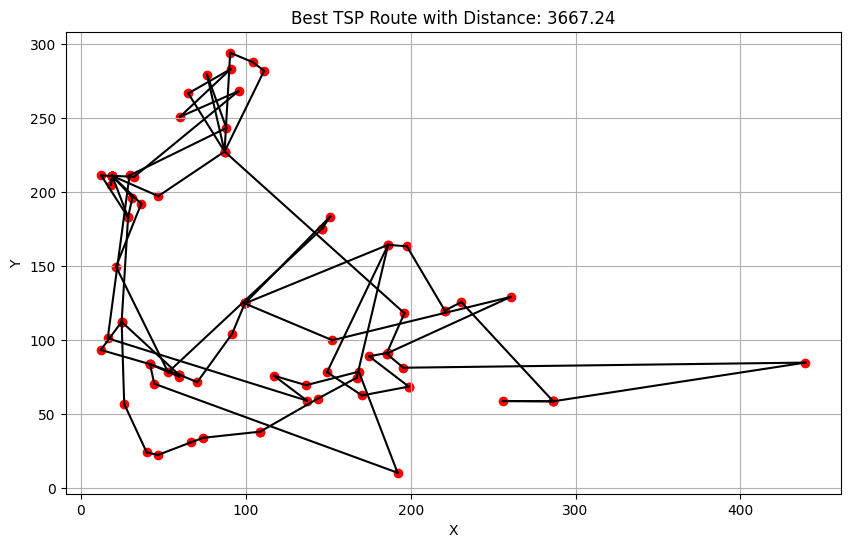

In [ ]:
# Configuration for the Bees Algorithm
max_gens = 100       # Maximum number of generations
num_bees = 70        # Total number of bees
num_sites = 15       # Number of sites selected out of n bees
elite_sites = 10      # Number of top sites out of m selected sites
e_bees = 15          # Number of bees recruited for top e sites
o_bees = 10           # Number of bees recruited for the other (m-e) sites

# Execute the Bees Algorithm for TSP
best_solution = bees_algorithm_tsp_bees_distribution(max_gens, num_cities, num_bees, num_sites, elite_sites, e_bees, o_bees)

# Display the best solution found
print(f"Best Solution: Distance={-best_solution['fitness']:.2f}")
plot_route(best_solution['route'], coordinates_df, title=f"Best TSP Route with Distance: {-best_solution['fitness']:.2f}")